In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/archive/CVD_cleaned.csv")
#https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [3]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.isnull().sum() > 0

General_Health                  False
Checkup                         False
Exercise                        False
Heart_Disease                   False
Skin_Cancer                     False
Other_Cancer                    False
Depression                      False
Diabetes                        False
Arthritis                       False
Sex                             False
Age_Category                    False
Height_(cm)                     False
Weight_(kg)                     False
BMI                             False
Smoking_History                 False
Alcohol_Consumption             False
Fruit_Consumption               False
Green_Vegetables_Consumption    False
FriedPotato_Consumption         False
dtype: bool

In [5]:
##transformar em numérico

In [6]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

'Poor', 'Very Good', 'Good', 'Fair', 'Excellent' == variable ordinal 

In [7]:
General_Healthmap = {'Poor' : 0 , 'Very Good': 3, 'Good': 2, 'Fair' : 1, 'Excellent' : 4}

df['General_Health'] =  df['General_Health'].map(General_Healthmap)
df['General_Health'].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [8]:
yesmap = {'Yes' : 1, 'No' : 0}
yesmap

{'Yes': 1, 'No': 0}

In [9]:
df['Exercise'] = df['Exercise'].map(yesmap)
df['Exercise']

0         0
1         0
2         1
3         1
4         0
         ..
308849    1
308850    1
308851    1
308852    1
308853    1
Name: Exercise, Length: 308854, dtype: int64

In [10]:
df['Heart_Disease'] = df['Heart_Disease'].map(yesmap)
df['Heart_Disease']

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308854, dtype: int64

In [11]:
df['Depression'] = df['Depression'].map(yesmap)
df['Depression']

0         0
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    1
308852    0
308853    0
Name: Depression, Length: 308854, dtype: int64

In [12]:
df['Alcohol_Consumption']

0         0.0
1         0.0
2         4.0
3         0.0
4         0.0
         ... 
308849    4.0
308850    8.0
308851    4.0
308852    3.0
308853    1.0
Name: Alcohol_Consumption, Length: 308854, dtype: float64

In [13]:
df['Skin_Cancer'] = df['Skin_Cancer'].map(yesmap)
df['Skin_Cancer']

0         0
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Skin_Cancer, Length: 308854, dtype: int64

In [14]:
df['Other_Cancer'] = df['Other_Cancer'].map(yesmap)
df['Other_Cancer']

0         0
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Other_Cancer, Length: 308854, dtype: int64

In [15]:
df['Arthritis']=df['Arthritis'].map(yesmap)
df['Arthritis']

0         1
1         0
2         0
3         0
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Arthritis, Length: 308854, dtype: int64

In [16]:
##sex is binary male = 1
sexmap = {'Male' : 1, 'Female' : 0}

In [17]:
df['IsMale'] = df['Sex'].map(sexmap)
df['IsMale']
df.drop(columns='Sex', inplace = True)

In [18]:
df['Smoking_History'] = df['Smoking_History'].map(yesmap)
df['Smoking_History']

0         1
1         0
2         0
3         0
4         1
         ..
308849    0
308850    0
308851    1
308852    0
308853    0
Name: Smoking_History, Length: 308854, dtype: int64

In [19]:
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

# CheckUp - ordinal
'Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never'] -ordinal

In [20]:
CheckUpmap = {'Within the past year' : 0 , 'Within the past 2 years' : 1,  'Within the past 5 years' : 2 , '5 or more years ago' : 3, 
                'Never' : 4}
CheckUpmap

{'Within the past year': 0,
 'Within the past 2 years': 1,
 'Within the past 5 years': 2,
 '5 or more years ago': 3,
 'Never': 4}

In [21]:
df['Checkup'] = df['Checkup'].map(CheckUpmap)
df['Checkup'].unique()


array([1, 0, 3, 2, 4], dtype=int64)

In [22]:
diabetes = pd.get_dummies(data = df['Diabetes'], prefix = "Diabetes_")
diabetes.head()

df = pd.concat([df, diabetes], axis=1)
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,IsMale,Diabetes__No,"Diabetes__No, pre-diabetes or borderline diabetes",Diabetes__Yes,"Diabetes__Yes, but female told only during pregnancy"
0,0,1,0,0,0,0,0,No,1,70-74,...,1,0.0,30.0,16.0,12.0,0,1,0,0,0
1,3,0,0,1,0,0,0,Yes,0,70-74,...,0,0.0,30.0,0.0,4.0,0,0,0,1,0
2,3,0,1,0,0,0,0,Yes,0,60-64,...,0,4.0,12.0,3.0,16.0,0,0,0,1,0
3,0,0,1,1,0,0,0,Yes,0,75-79,...,0,0.0,30.0,30.0,8.0,1,0,0,1,0
4,2,0,0,0,0,0,0,No,0,80+,...,1,0.0,8.0,4.0,0.0,1,1,0,0,0


In [23]:
df.drop(columns='Diabetes' , inplace=True)

In [24]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [25]:

Agecatmap = {'18-24' : 1 ,  '25-29' : 2, '30-34' : 3,  '35-39' : 4, '40-44' : 5 , '45-49' : 6,'50-54' : 7, '55-59' : 8 ,'60-64' : 9,  '65-69' : 10 ,'70-74' : 11 ,'75-79' : 12, '80+' : 13}

In [26]:
df['Age_Category'] = df['Age_Category'].map(Agecatmap)
df['Age_Category'].unique()

array([11,  9, 12, 13, 10,  7,  6,  1,  3,  8,  4,  5,  2], dtype=int64)

In [27]:
##checar se tem variavel null

df.isnull().sum().sum() ##0

0

In [28]:
matrix = df.corr()

<Axes: >

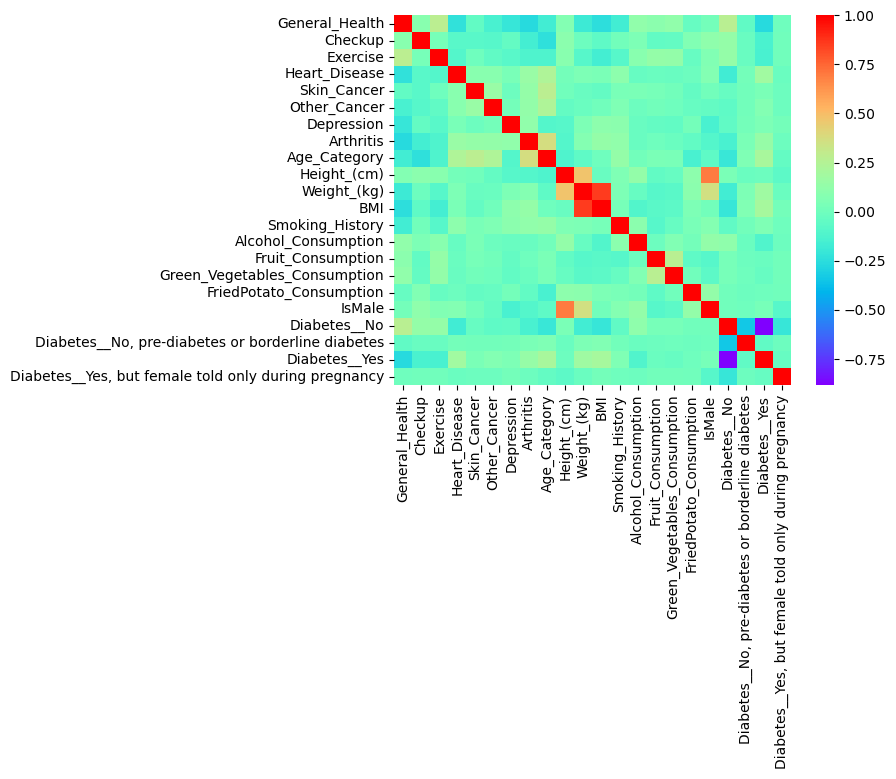

In [29]:
sns.heatmap(matrix, cmap='rainbow')

In [30]:
abs(matrix['Heart_Disease'])

General_Health                                          0.232503
Checkup                                                 0.085596
Exercise                                                0.096347
Heart_Disease                                           1.000000
Skin_Cancer                                             0.090848
Other_Cancer                                            0.092387
Depression                                              0.032526
Arthritis                                               0.153913
Age_Category                                            0.229011
Height_(cm)                                             0.015780
Weight_(kg)                                             0.045875
BMI                                                     0.042666
Smoking_History                                         0.107797
Alcohol_Consumption                                     0.036569
Fruit_Consumption                                       0.020055
Green_Vegetables_Consumpt

## Visualization

<Axes: xlabel='Heart_Disease', ylabel='General_Health'>

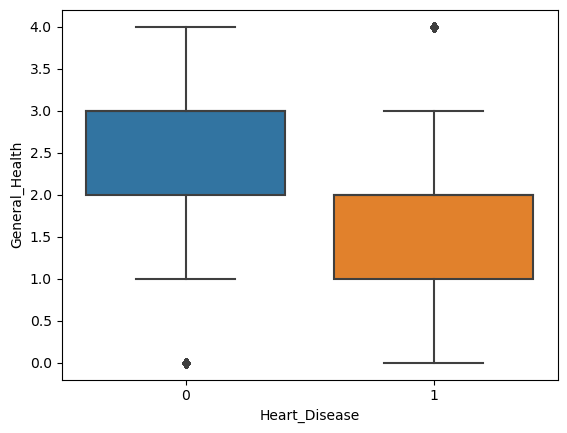

In [31]:
sns.boxplot(x = df['Heart_Disease'], y = df['General_Health'])

In [32]:
df.groupby(by = 'Heart_Disease').describe()['Checkup']

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
0,283883.0,0.402712,0.832800,0.0,0.0,0.0,0.0,4.0
1,24971.0,0.146770,0.522505,0.0,0.0,0.0,0.0,4.0


In [33]:
df[df['Heart_Disease'] == 1]['Checkup'].mean(), df[df['Heart_Disease'] == 0]['Checkup'].mean()


###pessoas com doenças no coração tendem a fazer check_up com maior frequência.

(0.1467702534940531, 0.40271168051626904)

In [34]:
df['Heart_Disease'].mean()

0.08085049894124732

<Axes: xlabel='Checkup', ylabel='Heart_Disease'>

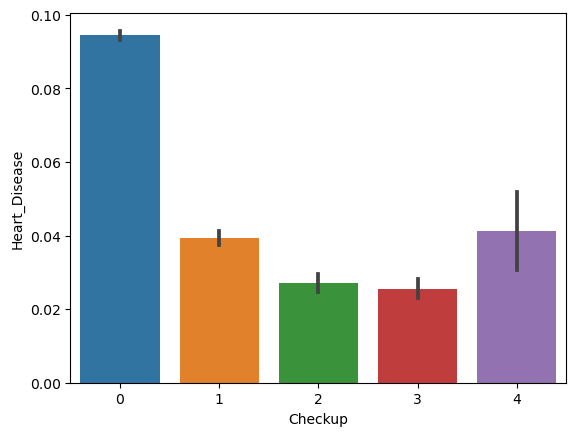

In [35]:
sns.barplot(x = df['Checkup'], y = df['Heart_Disease'])
###pessoas com doenças no coração tendem a fazer check_up com maior frequência.

<Axes: xlabel='Heart_Disease', ylabel='Checkup'>

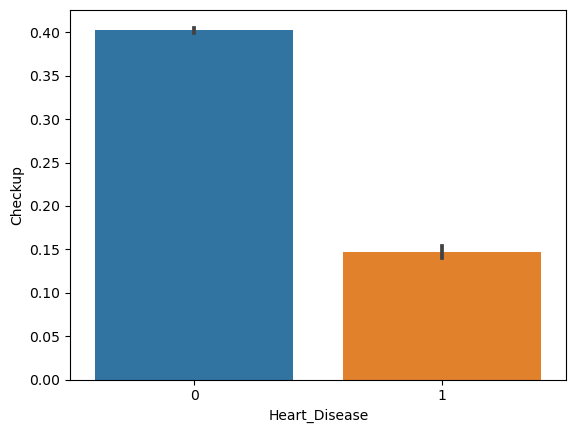

In [36]:
sns.barplot(y = df['Checkup'], x = df['Heart_Disease'])##maior frequencia pessoas com problema no coração**

In [37]:
df[df['Exercise'] == 1]['Heart_Disease'].mean(), df[df['Exercise'] == 0]['Heart_Disease'].mean() ##pessoas que fazem exercicio
##tem metade da chance de doenças no coração
df[df['Exercise'] == 1]['Heart_Disease'].mean()/ df[df['Exercise'] == 0]['Heart_Disease'].mean()

#0.5146526521569734 de chance a menos**

0.5146526521569734

<Axes: xlabel='Exercise', ylabel='Heart_Disease'>

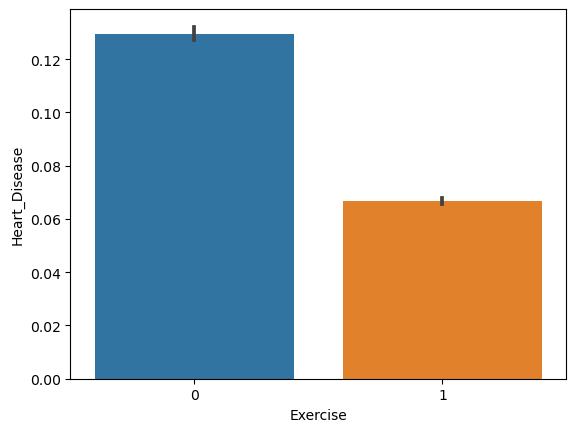

In [38]:
sns.barplot(y = df['Heart_Disease'], x = df['Exercise'])

In [39]:
df.groupby(by = 'Exercise' ).describe()['Heart_Disease']

,count,mean,std,min,25%,50%,75%,max
Exercise,,,,,,,,
0,69473.0,0.129604,0.335870,0.0,0.0,0.0,0.0,1.0
1,239381.0,0.066701,0.249504,0.0,0.0,0.0,0.0,1.0


In [40]:
df[df['Skin_Cancer'] == 1]['Heart_Disease'].mean(), df[df['Skin_Cancer'] == 0]['Heart_Disease'].mean() ##
##skin cancer has ~ 2.14 times more chance to has heart_disease
df[df['Skin_Cancer'] == 1]['Heart_Disease'].mean()/ df[df['Skin_Cancer'] == 0]['Heart_Disease'].mean()

2.1499844238525405

<Axes: xlabel='Skin_Cancer', ylabel='Heart_Disease'>

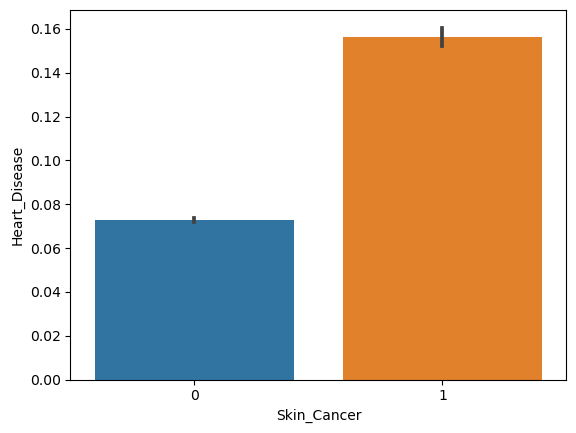

In [41]:
sns.barplot(y = df['Heart_Disease'], x = df['Skin_Cancer'])

In [42]:
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean(), df[df['Other_Cancer'] == 0]['Heart_Disease'].mean() ##
##Other_Cancer  has ~ 2.17 times more chance to has heart_disease
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean()/ df[df['Other_Cancer'] == 0]['Heart_Disease'].mean()

2.173418346774513

In [ ]:
sns.barplot(y = df['Heart_Disease'], x = df['Other_Cancer'])

In [ ]:
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean(), df[df['Other_Cancer'] == 0]['Heart_Disease'].mean() ##
##Other_Cancer  has ~ 2.17 times more chance to has heart_disease
df[df['Other_Cancer'] == 1]['Heart_Disease'].mean()/ df[df['Other_Cancer'] == 0]['Heart_Disease'].mean()

In [ ]:
def ratioheartdisease(df,column):
    ratio = df[df[column] == 1]['Heart_Disease'].mean()/ df[df[column] == 0]['Heart_Disease'].mean()
    sns.barplot(y = df['Heart_Disease'], x = df[column])
    print(f'ratio heart disease ~ {round(ratio, 3)} if {column} is True')

In [ ]:
ratioheartdisease(df,column = 'Depression')

In [ ]:
ratioheartdisease(df,column = 'Arthritis')

In [ ]:
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category']) ##proporção Heart disease**

In [ ]:
sns.barplot(y = df['Heart_Disease'], x = df['Age_Category'], hue = df['Exercise'])
##se fizer exercicio você consegue retardar doenças cardiacas***

In [ ]:
df.groupby(by = 'Heart_Disease').describe()['Height_(cm)'] ##nao parece ter muita interferencia na altura

In [ ]:
sns.violinplot(x = df['Heart_Disease'], y = df['Height_(cm)'])

In [ ]:
df.groupby(by = 'Heart_Disease').describe()['Weight_(kg)']### a media de peso de pessoas com doenças no coração é maior**

In [ ]:
sns.violinplot(x = df['Heart_Disease'], y = df['Weight_(kg)'])

In [ ]:
df.groupby(by = 'Heart_Disease').describe()['BMI']  #media de BMI de pessoas com doenças no coração é maior**

In [ ]:
sns.violinplot(x = df['Heart_Disease'], y = df['BMI'])

In [ ]:
ratioheartdisease(df, 'Smoking_History')

In [ ]:
df.groupby(by = 'Heart_Disease').describe()['Alcohol_Consumption'] 

In [ ]:
sns.violinplot(x = df['Heart_Disease'], y = df['Alcohol_Consumption'])###pessoas com doenças de coração estão bebendo menos

In [ ]:
sns.violinplot(x = df['Heart_Disease'], y = df['Alcohol_Consumption']) ###pessoas com doenças de coração estão bebendo menos

In [ ]:
sns.boxplot(x = df['Heart_Disease'], y = df['Fruit_Consumption']) ## quem consome + fruta tem em média menos doença do coração

In [ ]:
sns.boxplot(x = df['Age_Category'], y = df['Fruit_Consumption'])

In [ ]:
sns.boxplot(x = df['Heart_Disease'], y = df['Green_Vegetables_Consumption']) ## quem consome + Green_Vegetables_Consumption tem em média menos doença do coração

In [ ]:
sns.boxplot(x = df['Age_Category'], y = df['FriedPotato_Consumption'])##consumo de batatas fritas é maior entre os mais jovens**

In [ ]:
sns.boxplot(x = df['Age_Category'], y = df['Green_Vegetables_Consumption'], hue=df['Heart_Disease'])##jovens que comem muita batata frita 
##tem maioir chance de ter doenças no coração 2-3

In [ ]:
df.groupby(by = 'Heart_Disease').describe()['IsMale'] 

In [ ]:
ratioheartdisease(df, 'IsMale') ##homens tem 1.64 mais chance de ter doenças no coração

In [ ]:
df.groupby(by = 'Heart_Disease').describe()['IsMale']  ##men has more probability of have heart_disease

In [ ]:
ratioheartdisease(df, column = 'Diabetes__Yes') ##diabetes aumenta em 3.3x a chance de doenças no coração**

In [ ]:
ratioheartdisease(df, column = 'Diabetes__Yes, but female told only during pregnancy') 

In [ ]:
ratioheartdisease(df, column = 'Diabetes__No') 

In [ ]:
ratioheartdisease(df, column = 'Diabetes__No, pre-diabetes or borderline diabetes') ##pre diabetes aumenta em 1.43x

In [ ]:
df['Heart_Disease'].mean()

In [ ]:
sns.barplot(y = df['Diabetes__Yes'], x = df['Age_Category'], hue = df['Heart_Disease'])###pessoas com diabetes tem alta chance
#de ter problemas no coração*** quando depois do 55 anos chega a quase 35% de chance

In [ ]:
df.groupby(by = ['Heart_Disease', 'Age_Category']).describe()['Diabetes__Yes']['mean']

In [ ]:
y = df['Heart_Disease']
X = df.drop(columns='Heart_Disease')

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(objective='binary:logistic', scale_pos_weight=sum(y_train==0)/sum(y_train==1),)

In [ ]:
model.fit(X = X_train,y =  y_train)

In [ ]:
predict = model.predict(X = X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predict))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#True negatives (TN): 41861 - The model correctly predicted class 0.

False positives (FP): 14912 - The model incorrectly predicted class 1

False negatives (FN): 1116 - The model incorrectly predicted class 0 .

True positives (TP): 3882 - The model correctly predicted class 1.

In [ ]:
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, predict)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()